## env

In [2]:
import torch
import random
import numpy as np
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn.functional as F
from dataloader import read_bci_data

In [3]:
print(torch.__version__)
print(torch.cuda.is_available())

2.0.1
True


## data

In [4]:
train_data, train_label, test_data, test_label = read_bci_data()

# EEGNet

## EEGNet_ELU

In [5]:
class EEGNet_ELU(nn.Module):
    def __init__(self):
        super(EEGNet_ELU, self).__init__()

        self.firstconv = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(1, 51), padding=(0, 25), bias=False ), 
            nn.BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)  
        )

        self.depthwiseConv = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(2, 1), stride=(1, 1), groups=16, bias=False), 
            nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 
            nn.ELU(alpha=1.0),
            nn.AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0),
            nn.Dropout(p=0.2) 
        )

        self.separableConv = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1, 15), stride=(1, 1), padding=(0, 7), bias=False),  
            nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ELU(alpha=1.0),
            nn.AvgPool2d(kernel_size=(1, 8), stride=(1, 8), padding=0),
            nn.Dropout(p=0.2)
        )

        self.classify = nn.Sequential(
            #nn.Flatten(),
            nn.Linear(in_features=32*1*23, out_features=2, bias=True)
        )

    def forward(self, x):
        x = self.firstconv(x)
        #print("block1", x.shape)
        x = self.depthwiseConv(x)
        #print("block2", x.shape)
        x = self.separableConv(x)
        #print("block3", x.shape)
        
        x = x.view(x.size(0), -1)
        x = self.classify(x)
        
        return F.softmax(x, dim=1), x

## EEGNet_ReLU

In [6]:
class EEGNet_ReLU(nn.Module):
    def __init__(self):
        super(EEGNet_ReLU, self).__init__()

        self.firstconv = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(1, 51), padding=(0, 25), bias=False ), 
            nn.BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)  
        )

        self.depthwiseConv = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(2, 1), stride=(1, 1), groups=16, bias=False), 
            nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0),
            nn.Dropout(p=0.2) 
        )

        self.separableConv = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1, 15), stride=(1, 1), padding=(0, 7), bias=False),  
            nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.ReLU(),
            nn.AvgPool2d(kernel_size=(1, 8), stride=(1, 8), padding=0),
            nn.Dropout(p=0.2)
        )

        self.classify = nn.Sequential(
            #nn.Flatten(),
            nn.Linear(in_features=32*1*23, out_features=2, bias=True)
        )

    def forward(self, x):
        x = self.firstconv(x)
        #print("block1", x.shape)
        x = self.depthwiseConv(x)
        #print("block2", x.shape)
        x = self.separableConv(x)
        #print("block3", x.shape)

        x = x.view(x.size(0), -1)   
        x = self.classify(x)
        
        return F.softmax(x, dim=1), x

## EEGNet_LeakyReLU

In [7]:
class EEGNet_LeakyReLU(nn.Module):
    def __init__(self):
        super(EEGNet_LeakyReLU, self).__init__()

        self.firstconv = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=(1, 51), padding=(0, 25), bias=False ), 
            nn.BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)  
        )

        self.depthwiseConv = nn.Sequential(
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(2, 1), stride=(1, 1), groups=16, bias=False), 
            nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 
            nn.LeakyReLU(),
            nn.AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0),
            nn.Dropout(p=0.2) 
        )

        self.separableConv = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(1, 15), stride=(1, 1), padding=(0, 7), bias=False),  
            nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True),
            nn.LeakyReLU(),
            nn.AvgPool2d(kernel_size=(1, 8), stride=(1, 8), padding=0),
            nn.Dropout(p=0.2)
        )

        self.classify = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=32*1*23, out_features=2, bias=True)
        )

    def forward(self, x):
        x = self.firstconv(x)
        #print("block1", x.shape)
        x = self.depthwiseConv(x)
        #print("block2", x.shape)
        x = self.separableConv(x)
        #print("block3", x.shape)

        #x = x.view(x.size(0), -1)   
        x = self.classify(x)
        
        return F.softmax(x, dim=1), x

## EEGNet train

In [8]:
def shuffle_data(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def fit_partial(x, y):
    
    pred_label_, _ = model(torch.tensor(x).to(torch.float32).to(device))
    train_label_ = torch.tensor(y).to(torch.float32)
    train_label_ = torch.zeros((len(train_label_), 2)).scatter_(1, train_label_.long().reshape(-1, 1), 1).to(device)

    loss = criterion(pred_label_, train_label_)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return pred_label_, loss.item()

def fit(epoch, batch_size, save_path):
    
    
    train_meta = []
    
    step = int(len(train_data)/batch_size)
    max_acc = 0
    #print("epoch:{}, batch_size:{}".format(epoch, batch_size))

    for i in range(epoch):
        
        correct_sum = 0
        model.train()
        for j in range(step):
            x = train_data[j*batch_size:(j+1)*batch_size]
            y = train_label[j*batch_size:(j+1)*batch_size]

            pred_y, loss = fit_partial(x, y)
            
            correct = (pred_y.argmax(dim=1).cpu().detach().numpy() == y).sum()
            
            correct_sum += correct
            #print("Epoch {} / Step {} : loss: {}, accuracy: {:4f}%".format(i+1, j+1, loss, (correct/len(x)*100)))
        
        model.eval()
        
        # calculate test acc
        pred_y_test, _ = model(torch.tensor(test_data).to(torch.float32).to(device))
        correct_test = (pred_y_test.argmax(dim=1).cpu().detach().numpy() == test_label).sum()
        
        if i == 0 or (correct_test/1080) > max_acc:
            torch.save(model, save_path)
            max_acc = correct_test/1080
        
        train_meta.append([i+1, loss, correct_sum/1080, correct_test/1080])
        
        shuffle_data(train_data, train_label)
        
    return train_meta

In [9]:
# EEGNet

learning_rate = 1e-3
momentum = 0.5
epoch = 550
batch_size = 120

device = torch.device("cuda")
model = EEGNet_ELU().to(device)
print(model)
criterion = nn.CrossEntropyLoss() # BCEWithLogitsLoss BCELoss CrossEntropyLoss MSELoss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01) # SGD Adam RMSprop
print("EEGNet_ELU starts fitting...")
eeg_elu_train_meta = fit(epoch, batch_size, 'EEGNet_ELU.pt')
eeg_elu_train_meta = np.array(eeg_elu_train_meta)
print("EEGNet_ELU finished\n")

device = torch.device("cuda")
model = EEGNet_ReLU().to(device)
print(model)
criterion = nn.CrossEntropyLoss() # BCEWithLogitsLoss BCELoss CrossEntropyLoss MSELoss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01) # SGD Adam RMSprop
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, momentum = 0.5, weight_decay=0.01) # SGD Adam RMSprop
print("EEGNet_ReLU starts fitting...")
eeg_relu_train_meta = fit(epoch, batch_size, 'EEGNet_ReLU.pt')
eeg_relu_train_meta = np.array(eeg_relu_train_meta)
print("EEGNet_ReLU finished\n")

device = torch.device("cuda")
model = EEGNet_LeakyReLU().to(device)
print(model)
criterion = nn.CrossEntropyLoss() # BCEWithLogitsLoss BCELoss CrossEntropyLoss MSELoss
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, betas=(0.9, 0.999), eps=1e-08, weight_decay=0.01) # SGD Adam RMSprop
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, momentum = 0.5, weight_decay=0.01) # SGD Adam RMSprop
print("EEGNet_LeakyReLU starts fitting...")
eeg_leakyrelu_train_meta = fit(epoch, batch_size, 'EEGNet_LeakyReLU.pt')
eeg_leakyrelu_train_meta = np.array(eeg_leakyrelu_train_meta)
print("EEGNet_LeakyReLU finished\n")

EEGNet_ELU(
  (firstconv): Sequential(
    (0): Conv2d(1, 16, kernel_size=(1, 51), stride=(1, 1), padding=(0, 25), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (depthwiseConv): Sequential(
    (0): Conv2d(16, 32, kernel_size=(2, 1), stride=(1, 1), groups=16, bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): AvgPool2d(kernel_size=(1, 4), stride=(1, 4), padding=0)
    (4): Dropout(p=0.2, inplace=False)
  )
  (separableConv): Sequential(
    (0): Conv2d(32, 32, kernel_size=(1, 15), stride=(1, 1), padding=(0, 7), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=1.0)
    (3): AvgPool2d(kernel_size=(1, 8), stride=(1, 8), padding=0)
    (4): Dropout(p=0.2, inplace=False)
  )
  (classify): Sequential(
    (0): Linear(in_features=736, out_features=2, bias=True)
  )
)
EEGNet_ELU sta

In [10]:
# print("Train: relu {}, leakyrelu {}".format(eeg_relu_train_meta[:,2][-1], eeg_leakyrelu_train_meta[:,2][-1]))
# print("Train : relu {}, leakyrelu {}".format(max(eeg_relu_train_meta[:,2]), max(eeg_leakyrelu_train_meta[:,2])))
# print("Test : relu {}, leakyrelu {}".format(eeg_relu_train_meta[:,3][-1], eeg_leakyrelu_train_meta[:,3][-1]))
# print("Test : relu {}, leakyrelu {}".format(max(eeg_relu_train_meta[:,3]), max(eeg_leakyrelu_train_meta[:,3])))
print("Train: elu {}, relu {}, leakyrelu {}".format(eeg_elu_train_meta[:,2][-1], eeg_relu_train_meta[:,2][-1], eeg_leakyrelu_train_meta[:,2][-1]))
#print("Train : elu {}, relu {}, leakyrelu {}".format(max(eeg_elu_train_meta[:,2]), max(eeg_relu_train_meta[:,2]), max(eeg_leakyrelu_train_meta[:,2])))
#print("Test : elu {}, relu {}, leakyrelu {}".format(eeg_elu_train_meta[:,3][-1], eeg_relu_train_meta[:,3][-1], eeg_leakyrelu_train_meta[:,3][-1]))
print("Test : elu {}, relu {}, leakyrelu {}".format(max(eeg_elu_train_meta[:,3]), max(eeg_relu_train_meta[:,3]), max(eeg_leakyrelu_train_meta[:,3])))

Train: elu 0.8777777777777778, relu 0.950925925925926, leakyrelu 0.9398148148148148
Test : elu 0.8166666666666667, relu 0.85, leakyrelu 0.8629629629629629


## EEGNet visualize result

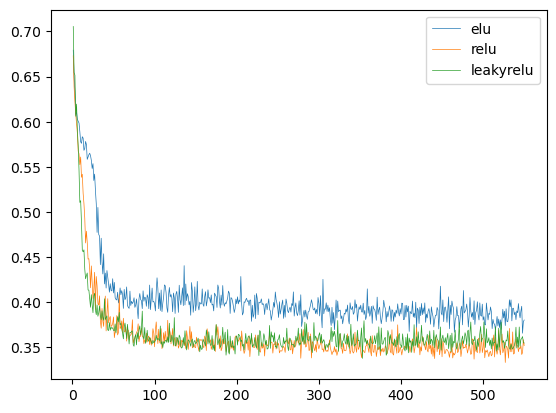

In [11]:
plt.figure("Loss")
plt.plot(eeg_elu_train_meta[:,0], eeg_elu_train_meta[:,1], label='loss', linewidth='0.5') # blue
plt.plot(eeg_relu_train_meta[:,0], eeg_relu_train_meta[:,1], label='loss', linewidth='0.5') # yellow
plt.plot(eeg_leakyrelu_train_meta[:,0], eeg_leakyrelu_train_meta[:,1], label='loss', linewidth='0.5') # green
plt.legend(['elu', 'relu', 'leakyrelu'])
plt.show()

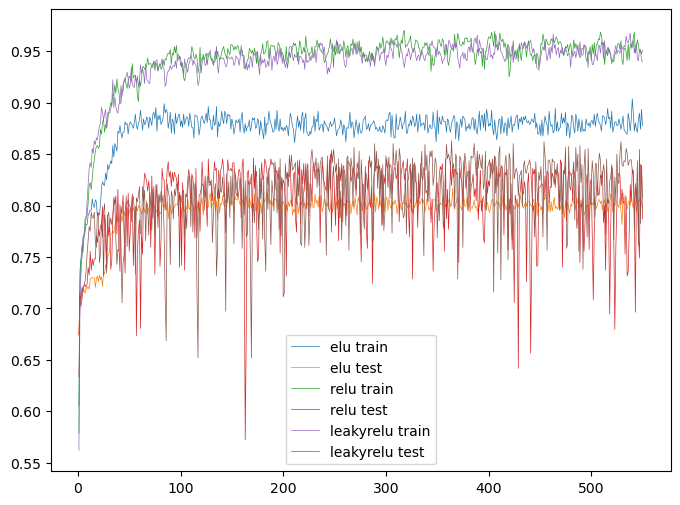

In [12]:
# EEGNet
plt.figure("Accuracy", figsize=(8, 6))
plt.plot(eeg_elu_train_meta[:,0], eeg_elu_train_meta[:,2], label='loss', linewidth='0.5') # blue - elu_train
plt.plot(eeg_elu_train_meta[:,0], eeg_elu_train_meta[:,3], label='loss', linewidth='0.5') # yellow - elu_test
plt.plot(eeg_relu_train_meta[:,0], eeg_relu_train_meta[:,2], label='loss', linewidth='0.5') # green - relu_train
plt.plot(eeg_relu_train_meta[:,0], eeg_relu_train_meta[:,3], label='loss', linewidth='0.5') # red - relu_test
plt.plot(eeg_leakyrelu_train_meta[:,0], eeg_leakyrelu_train_meta[:,2], label='loss', linewidth='0.5') # purple - leakyrelu_train
plt.plot(eeg_leakyrelu_train_meta[:,0], eeg_leakyrelu_train_meta[:,3], label='loss', linewidth='0.5') # brown - leakyrelu_test
plt.legend(['elu train', 'elu test', 'relu train', 'relu test', 'leakyrelu train', 'leakyrelu test'])
plt.show()

## Test model accuracy (not needed)

In [18]:
model_save = torch.load('EEGNet_LeakyReLU0.8675.pt', map_location=torch.device(0)) # EEGNet_ELU EEGNet_ReLU EEGNet_LeakyReLU 
#torch.save(model, 'EEGNet_LeakyReLU.pt') # save model
#torch.save(model.state_dict(), 'EEGNet.pt') # save weight
print(model_save)

In [210]:
pred_y_test_save, _ = model_save(torch.tensor(test_data).to(torch.float32).to(device))
correct_test_save = (pred_y_test_save.argmax(dim=1).cpu().detach().numpy() == test_label).sum()
print("Accuracy: {}".format(correct_test_save/1080))

Accuracy: 0.8675925925925926


# DeepConvNet

## DeepConvNet_ELU

In [14]:
class DeepConvNet_ELU(nn.Module):
    def __init__(self):
        super(DeepConvNet_ELU, self).__init__()
        
        self.Conv2d_1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=25, kernel_size=(1, 5), bias=False),
            nn.Conv2d(in_channels=25, out_channels=25, kernel_size=(2, 1), bias=False),
            nn.BatchNorm2d(25, eps=1e-05, momentum=0.1),
            nn.ELU(alpha=0.5),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.Conv2d_2 = nn.Sequential(
            nn.Conv2d(in_channels=25, out_channels=50, kernel_size=(1, 5), bias=False),
            nn.BatchNorm2d(50, eps=1e-05, momentum=0.1),
            nn.ELU(alpha=0.5),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.Conv2d_3 = nn.Sequential(
            nn.Conv2d(in_channels=50, out_channels=100, kernel_size=(1, 5), bias=False),
            nn.BatchNorm2d(100, eps=1e-05, momentum=0.1),
            nn.ELU(alpha=0.5),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.Conv2d_4 = nn.Sequential(
            nn.Conv2d(in_channels=100, out_channels=200, kernel_size=(1, 5), bias=False),
            nn.BatchNorm2d(200, eps=1e-05, momentum=0.1),
            nn.ELU(alpha=0.5),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.classify = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=200*1*43, out_features=2, bias=True)
        )

    def forward(self, x):
        
        x = self.Conv2d_1(x)
        x = self.Conv2d_2(x)
        x = self.Conv2d_3(x)
        x = self.Conv2d_4(x)
        #print("block4", x.shape)
        
        #x = x.view(x.size(0), -1)
        x = self.classify(x)
        
        return F.softmax(x, dim=1), x  

## DeepConvNet_ReLU

In [15]:
class DeepConvNet_ReLU(nn.Module):
    def __init__(self):
        super(DeepConvNet_ReLU, self).__init__()
        
        self.Conv2d_1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=25, kernel_size=(1, 5), bias=False),
            nn.Conv2d(in_channels=25, out_channels=25, kernel_size=(2, 1), bias=False),
            nn.BatchNorm2d(25, eps=1e-05, momentum=0.1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.Conv2d_2 = nn.Sequential(
            nn.Conv2d(in_channels=25, out_channels=50, kernel_size=(1, 5), bias=False),
            nn.BatchNorm2d(50, eps=1e-05, momentum=0.1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.Conv2d_3 = nn.Sequential(
            nn.Conv2d(in_channels=50, out_channels=100, kernel_size=(1, 5), bias=False),
            nn.BatchNorm2d(100, eps=1e-05, momentum=0.1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.Conv2d_4 = nn.Sequential(
            nn.Conv2d(in_channels=100, out_channels=200, kernel_size=(1, 5), bias=False),
            nn.BatchNorm2d(200, eps=1e-05, momentum=0.1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.classify = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=200*1*43, out_features=2, bias=True)
        )

    def forward(self, x):
        
        x = self.Conv2d_1(x)
        x = self.Conv2d_2(x)
        x = self.Conv2d_3(x)
        x = self.Conv2d_4(x)
        #print("block4", x.shape)
        
        #x = x.view(x.size(0), -1)
        x = self.classify(x)
        
        return F.softmax(x, dim=1), x  

## DeepConvNet_LeakyReLU

In [16]:
class DeepConvNet_LeakyReLU(nn.Module):
    def __init__(self):
        super(DeepConvNet_LeakyReLU, self).__init__()
        
        self.Conv2d_1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=25, kernel_size=(1, 5), bias=False),
            nn.Conv2d(in_channels=25, out_channels=25, kernel_size=(2, 1), bias=False),
            nn.BatchNorm2d(25, eps=1e-05, momentum=0.1),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.Conv2d_2 = nn.Sequential(
            nn.Conv2d(in_channels=25, out_channels=50, kernel_size=(1, 5), bias=False),
            nn.BatchNorm2d(50, eps=1e-05, momentum=0.1),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.Conv2d_3 = nn.Sequential(
            nn.Conv2d(in_channels=50, out_channels=100, kernel_size=(1, 5), bias=False),
            nn.BatchNorm2d(100, eps=1e-05, momentum=0.1),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.Conv2d_4 = nn.Sequential(
            nn.Conv2d(in_channels=100, out_channels=200, kernel_size=(1, 5), bias=False),
            nn.BatchNorm2d(200, eps=1e-05, momentum=0.1),
            nn.LeakyReLU(),
            nn.MaxPool2d(kernel_size=(1, 2)),
            nn.Dropout(p=0.35),
        )
        
        self.classify = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=200*1*43, out_features=2, bias=True)
        )

    def forward(self, x):
        
        x = self.Conv2d_1(x)
        x = self.Conv2d_2(x)
        x = self.Conv2d_3(x)
        x = self.Conv2d_4(x)
        #print("block4", x.shape)
        
        # x = x.view(x.size(0), -1)
        x = self.classify(x)
        
        return F.softmax(x, dim=1), x  

## DeepConvNet train

In [17]:
def shuffle_data(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

def fit_partial(x, y):
    
    pred_label_, _ = model(torch.tensor(x).to(torch.float32).to(device))
    train_label_ = torch.tensor(y).to(torch.float32)
    train_label_ = torch.zeros((len(train_label_), 2)).scatter_(1, train_label_.long().reshape(-1, 1), 1).to(device)

    loss = criterion(pred_label_, train_label_)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return pred_label_, loss.item()

def fit(epoch, batch_size, save_path):
    
    
    train_meta = []
    
    step = int(len(train_data)/batch_size)
    max_acc = 0
    #print("epoch:{}, batch_size:{}".format(epoch, batch_size))

    for i in range(epoch):
        
        correct_sum = 0
        model.train()
        for j in range(step):
            x = train_data[j*batch_size:(j+1)*batch_size]
            y = train_label[j*batch_size:(j+1)*batch_size]

            pred_y, loss = fit_partial(x, y)
            
            correct = (pred_y.argmax(dim=1).cpu().detach().numpy() == y).sum()
            
            correct_sum += correct
            #print("Epoch {} / Step {} : loss: {}, accuracy: {:4f}%".format(i+1, j+1, loss, (correct/len(x)*100)))
        
        model.eval()
        
        # calculate test acc
        pred_y_test, _ = model(torch.tensor(test_data).to(torch.float32).to(device))
        correct_test = (pred_y_test.argmax(dim=1).cpu().detach().numpy() == test_label).sum()
        
        if i == 0 or (correct_test/1080) > max_acc:
            torch.save(model, save_path)
            max_acc = correct_test/1080
        
        train_meta.append([i+1, loss, correct_sum/1080, correct_test/1080])
        
        shuffle_data(train_data, train_label)
        
    return train_meta

In [21]:
# DeepConvNet

learning_rate = 1e-3
momentum = 0.5
epoch = 600
batch_size = 120

device = torch.device("cuda")
model = DeepConvNet_ELU().to(device)
print(model)
criterion = nn.CrossEntropyLoss() # BCEWithLogitsLoss BCELoss CrossEntropyLoss MSELoss
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01) # SGD Adam RMSprop
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, momentum = 0.5, weight_decay=0.01) # SGD Adam RMSprop
print("DeepConvNet_ELU starts fitting...")
dcn_elu_train_meta = fit(epoch, batch_size, 'DeepConvNet_ELU.pt')
dcn_elu_train_meta = np.array(dcn_elu_train_meta)
print("DeepConvNet_ELU finished\n")

device = torch.device("cuda")
model = DeepConvNet_ReLU().to(device)
print(model)
criterion = nn.CrossEntropyLoss() # BCEWithLogitsLoss BCELoss CrossEntropyLoss
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01) # SGD Adam RMSprop
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, momentum = 0.5, weight_decay=0.01) # SGD Adam RMSprop
print("DeepConvNet_ReLU starts fitting...")
dcn_relu_train_meta = fit(epoch, batch_size, 'DeepConvNet_ReLU.pt')
dcn_relu_train_meta = np.array(dcn_relu_train_meta)
print("DeepConvNet_ReLU finished\n")

device = torch.device("cuda")
model = DeepConvNet_LeakyReLU().to(device)
print(model)
criterion = nn.CrossEntropyLoss() # BCEWithLogitsLoss BCELoss CrossEntropyLoss
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=0.01) # SGD Adam RMSprop
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate, momentum = 0.5, weight_decay=0.01) # SGD Adam RMSprop
print("DeepConvNet_LeakyReLU starts fitting...")
dcn_leakyrelu_train_meta = fit(epoch, batch_size, 'DeepConvNet_LeakyReLU.pt')
dcn_leakyrelu_train_meta = np.array(dcn_leakyrelu_train_meta)
print("DeepConvNet_LeakyReLU finished\n")

DeepConvNet_ELU(
  (Conv2d_1): Sequential(
    (0): Conv2d(1, 25, kernel_size=(1, 5), stride=(1, 1), bias=False)
    (1): Conv2d(25, 25, kernel_size=(2, 1), stride=(1, 1), bias=False)
    (2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ELU(alpha=0.5)
    (4): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.35, inplace=False)
  )
  (Conv2d_2): Sequential(
    (0): Conv2d(25, 50, kernel_size=(1, 5), stride=(1, 1), bias=False)
    (1): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=0.5)
    (3): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.35, inplace=False)
  )
  (Conv2d_3): Sequential(
    (0): Conv2d(50, 100, kernel_size=(1, 5), stride=(1, 1), bias=False)
    (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ELU(alpha=0.5)
    (

In [22]:
#print("Train: elu {}, relu {}, leakyrelu {}".format(dcn_elu_train_meta[:,2][-1], dcn_relu_train_meta[:,2][-1], dcn_leakyrelu_train_meta[:,2][-1]))
print("Train : elu {}, relu {}, leakyrelu {}".format(max(dcn_elu_train_meta[:,2]), max(dcn_relu_train_meta[:,2]), max(dcn_leakyrelu_train_meta[:,2])))
print("Test : elu {}, relu {}, leakyrelu {}".format(max(dcn_elu_train_meta[:,3]), max(dcn_relu_train_meta[:,3]), max(dcn_leakyrelu_train_meta[:,3])))## Test highest accuracy

Train : elu 0.9537037037037037, relu 0.9416666666666667, leakyrelu 0.9388888888888889
Test : elu 0.8212962962962963, relu 0.8388888888888889, leakyrelu 0.8305555555555556


## DeepConvNet visualize result

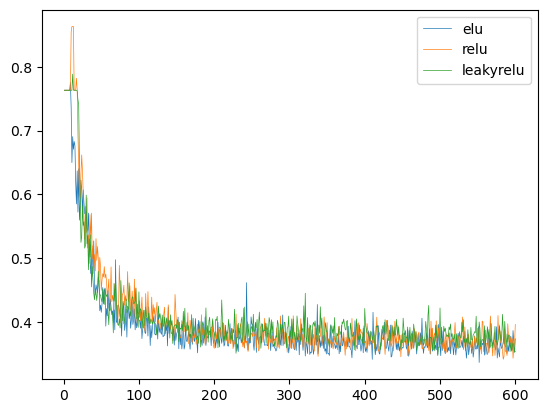

In [23]:
plt.figure("Loss")
plt.plot(dcn_elu_train_meta[:,0], dcn_elu_train_meta[:,1], label='loss', linewidth='0.5') # blue
plt.plot(dcn_relu_train_meta[:,0], dcn_relu_train_meta[:,1], label='loss', linewidth='0.5') # yellow
plt.plot(dcn_leakyrelu_train_meta[:,0], dcn_leakyrelu_train_meta[:,1], label='loss', linewidth='0.5') # green
plt.legend(['elu', 'relu', 'leakyrelu'])
plt.show()

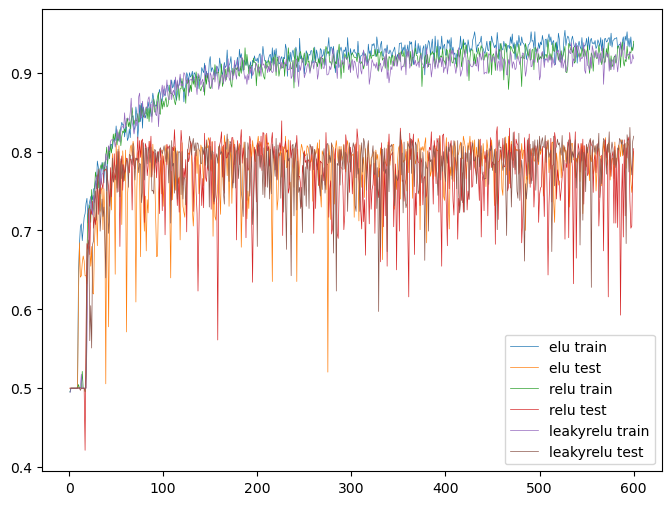

In [24]:
# DeepConvNet
plt.figure("Accuracy", figsize=(8, 6))
plt.plot(dcn_elu_train_meta[:,0], dcn_elu_train_meta[:,2], label='loss', linewidth='0.5') # blue - elu_train
plt.plot(dcn_elu_train_meta[:,0], dcn_elu_train_meta[:,3], label='loss', linewidth='0.5') # yellow - elu_test
plt.plot(dcn_relu_train_meta[:,0], dcn_relu_train_meta[:,2], label='loss', linewidth='0.5') # green - relu_train
plt.plot(dcn_relu_train_meta[:,0], dcn_relu_train_meta[:,3], label='loss', linewidth='0.5') # red - relu_test
plt.plot(dcn_leakyrelu_train_meta[:,0], dcn_leakyrelu_train_meta[:,2], label='loss', linewidth='0.5') #purple - leakyrelu_train
plt.plot(dcn_leakyrelu_train_meta[:,0], dcn_leakyrelu_train_meta[:,3], label='loss', linewidth='0.5') # brown - leakyrelu_test
plt.legend(['elu train', 'elu test', 'relu train', 'relu test', 'leakyrelu train', 'leakyrelu test'])
plt.show()

## Test model accuracy (not needed)

In [234]:
model_save = torch.load('DeepConvNet_ReLU0.8370.pt', map_location=torch.device(0)) # EEGNet_ELU EEGNet_ReLU EEGNet_LeakyReLU 
#torch.save(model, 'DeepConvNet_LeakyReLU.pt') # save model
#torch.save(model.state_dict(), 'EEGNet.pt') # save weight
print(model_save)

DeepConvNet_ReLU(
  (Conv2d_1): Sequential(
    (0): Conv2d(1, 25, kernel_size=(1, 5), stride=(1, 1), bias=False)
    (1): Conv2d(25, 25, kernel_size=(2, 1), stride=(1, 1), bias=False)
    (2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (5): Dropout(p=0.35, inplace=False)
  )
  (Conv2d_2): Sequential(
    (0): Conv2d(25, 50, kernel_size=(1, 5), stride=(1, 1), bias=False)
    (1): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=(1, 2), stride=(1, 2), padding=0, dilation=1, ceil_mode=False)
    (4): Dropout(p=0.35, inplace=False)
  )
  (Conv2d_3): Sequential(
    (0): Conv2d(50, 100, kernel_size=(1, 5), stride=(1, 1), bias=False)
    (1): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_si

In [235]:
pred_y_test_save, _ = model_save(torch.tensor(test_data).to(torch.float32).to(device))
correct_test_save = (pred_y_test_save.argmax(dim=1).cpu().detach().numpy() == test_label).sum()
print("Accuracy: {}".format(correct_test_save/1080))

Accuracy: 0.837037037037037
